## Задача 4 - Обработка данных ЯМР ##

Новиков Евгений 120м

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import math
from pylab import rcParams

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [2]:
sns.set_theme()
rcParams['figure.figsize'] = 10, 10

### Работа с файлом И124.prn ###

Чтение первого файла

In [3]:
raw_file = open('И124.prn')
data = {}

for line in raw_file:
    temp = line.split()
    data[float(temp[0])] = float(temp[1])

raw_file.close()

Создание массивов для удобной работы и перевод времени в мс

In [4]:
time = np.array(list(data.keys())).reshape(-1,1)
amp = np.array(list(data.values())).reshape(-1,1)
time_mc = time/1000

Создание массива времен релаксации Т2, взято 56 дискретов

In [5]:
T2 = np.logspace(-1,3, 56)

Проверка корректности данных, вывод графика

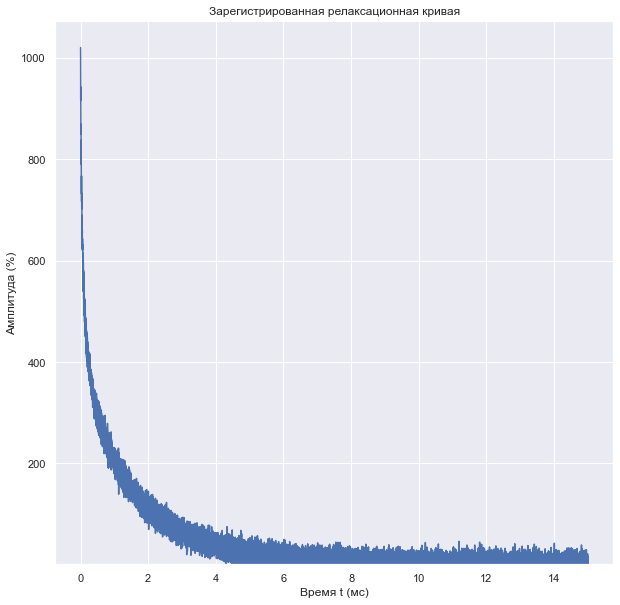

In [6]:
plt.plot(time_mc, amp)
#plt.yticks([1, 10, 100, 1000])

plt.ylim(1)
plt.xlabel('Время t (мс)');
plt.ylabel('Амплитуда (%)');
plt.title('Зарегистрированная релаксационная кривая');

Определение параметра ***B(T2)***.

Будет использовано несколько классификаторов:
* LinearRegression()
* Lasso()
* Ridge()
* ElasticNet()


Для каждого классификатора подготовлена своя сетка параметров

In [7]:
estimators = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
param_grids = {'LR':{},
               'Lasso': [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100]}],
               'Ridge': [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100]}],
               'ElasticNet': [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100],
                             'l1_ratio':[0.1, 0.2, 0.5, 0.7, 1]}]
              }

In [8]:
res = [] # проведен поиск по сетке для каждого классификатора
for clf, grid in zip(estimators, param_grids.keys()):
    gs = GridSearchCV(estimator = clf, param_grid = param_grids[grid])
    gs.fit(np.exp(-time_mc/T2), amp)
    res.append(['%s'%(clf), gs.best_score_, gs.best_estimator_])

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149089.70927163633, tolerance: 878.8487077035566
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1577926.7562611648, tolerance: 28191.73273615058
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1577222.301374685, tolerance: 27273.457614836665
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not c

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1644795.3980113307, tolerance: 28191.73273615058
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1614903.4965551812, tolerance: 27273.457614836665
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1586431.4546102164, tolerance: 26899.0638546003
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not c

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345234.77667544805, tolerance: 28191.73273615058
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346724.59207878215, tolerance: 27273.457614836665
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315949.0989813586, tolerance: 26899.0638546003
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not co

In [9]:
def best(res): # функция, которая ищет лучший классификатор по максимальной метрике
    max_score = 0
    best_cl = 0
    for i in res:
        if (float(i[1]) > max_score):
            max_score =float(i[1])
            best_cl = i[2]
    return max_score, best_cl

def best_sort(res, reverse): # возвращает отсортированный список результатов
    res.sort(key = lambda x: x[1], reverse = reverse)
    return res

In [10]:
best(res) # Видно, что лучший классификатор - Ridge регрессия с параметром alpha = 0.1

(0.28488290119413057, Ridge(alpha=0.1))

In [11]:
best_sort(res, True)

[['Ridge()', 0.28488290119413057, Ridge(alpha=0.1)],
 ['Lasso()', 0.2696575713395055, Lasso(alpha=0.0001)],
 ['ElasticNet()', 0.2696575713395055, ElasticNet(alpha=0.0001, l1_ratio=1)],
 ['LinearRegression()', -1.2058821852255452e+21, LinearRegression()]]

In [12]:
best_clf = best(res)[1]
best_clf.fit(np.exp(-time_mc/T2), amp)

Ridge(alpha=0.1)

Проверка качества регрессии

Сначала по метрике r2, потом по графику

In [13]:
r2_score(best_clf.predict(np.exp(-time_mc/T2)), amp)

0.9844212861071444

Text(0.5, 1.0, 'Зарегистрированная релаксационная кривая')

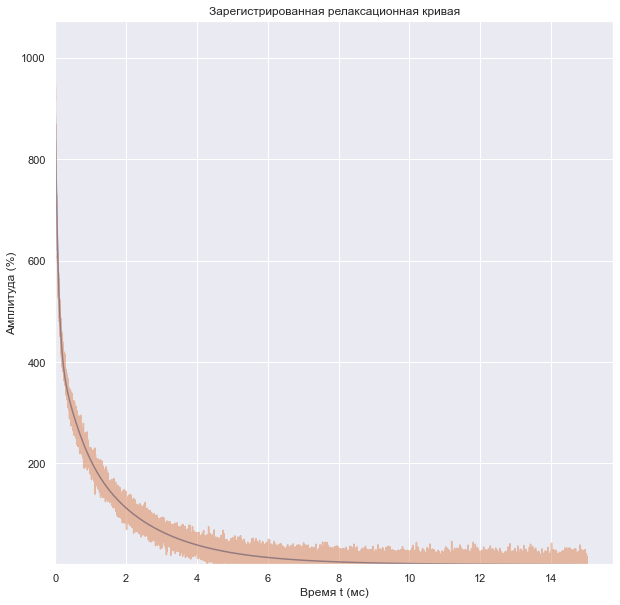

In [14]:
plt.plot(time_mc, best_clf.predict(np.exp(-time_mc/T2)))
plt.plot(time_mc, amp, alpha = 0.5)

plt.ylim(1)
plt.xlim(0)
plt.xlabel('Время t (мс)')
plt.ylabel('Амплитуда (%)')
plt.title('Зарегистрированная релаксационная кривая')

In [15]:
best_clf.coef_ # значения B(T2)

array([[ 6.65578795e+02,  1.47053593e+02, -1.29428459e+02,
        -2.09955995e+02, -1.61977585e+02, -5.77212557e+01,
         4.22678758e+01,  1.00747843e+02,  1.07470720e+02,
         7.46112697e+01,  2.63947793e+01, -1.28640372e+01,
        -2.80239718e+01, -1.69176396e+01,  1.16663821e+01,
         4.38859525e+01,  6.74389268e+01,  7.59242013e+01,
         6.96478347e+01,  5.35223062e+01,  3.38812079e+01,
         1.59223503e+01,  2.55735171e+00, -5.49122440e+00,
        -8.94760900e+00, -9.15884699e+00, -7.49591649e+00,
        -5.04573662e+00, -2.52819246e+00, -3.39252388e-01,
         1.35946711e+00,  2.55139788e+00,  3.29560677e+00,
         3.68066112e+00,  3.79786073e+00,  3.72802782e+00,
         3.53666528e+00,  3.27369092e+00,  2.97530691e+00,
         2.66659041e+00,  2.36407255e+00,  2.07798348e+00,
         1.81406594e+00,  1.57497069e+00,  1.36129299e+00,
         1.17232113e+00,  1.00656373e+00,  8.62112285e-01,
         7.36883784e-01,  6.28777935e-01,  5.35774458e-0

Text(0.5, 1.0, 'Рассчитываемый спектр')

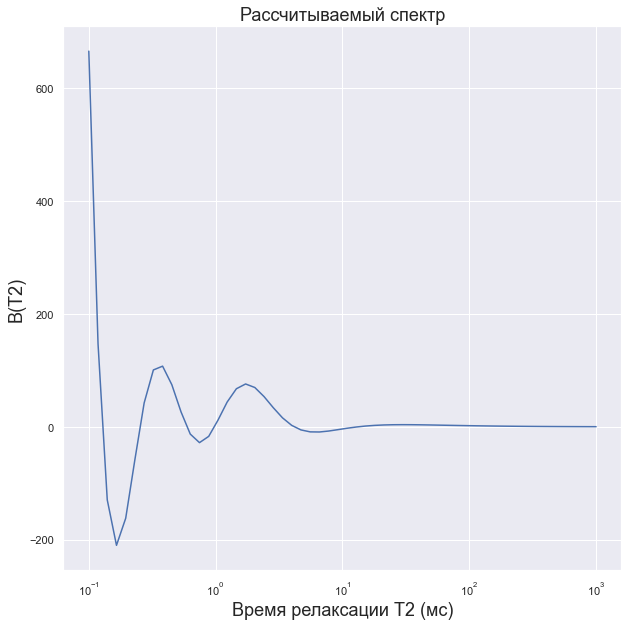

In [16]:
plt.semilogx(T2, best_clf.coef_.reshape(-1,1))
#plt.plot(time_mc, amp, alpha = 0.5)

#plt.ylim(0,130)
#plt.xlim(0)
plt.xlabel('Время релаксации Т2 (мс)', size = 18)
plt.ylabel('B(T2)', size = 18)
plt.title('Рассчитываемый спектр', size = 18)

Как видно, в ridge нельзя задать только положительные значения коэффициентов, так что придется брать другую модель

In [17]:
best_sort(res, True)[0][2], best_sort(res, True)[1][2],best_sort(res, True)[2][2] 
# второй п окачеству классификатор как-раз лассо, где можно задать полжительные коэффициенты

(Ridge(alpha=0.1), Lasso(alpha=0.0001), ElasticNet(alpha=0.0001, l1_ratio=1))

In [18]:
second = Lasso(alpha=0.0001, positive = True) # обучение регрессии Лассо с положительными коэффициентами
second.fit(np.exp(-time_mc/T2), amp)

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1317769.9174166871, tolerance: 28550.113727182623
  positive)


Lasso(alpha=0.0001, positive=True)

Вывод значений B(T2) и времени рекласации на график

Text(0.5, 1.0, 'Рассчитываемый спектр')

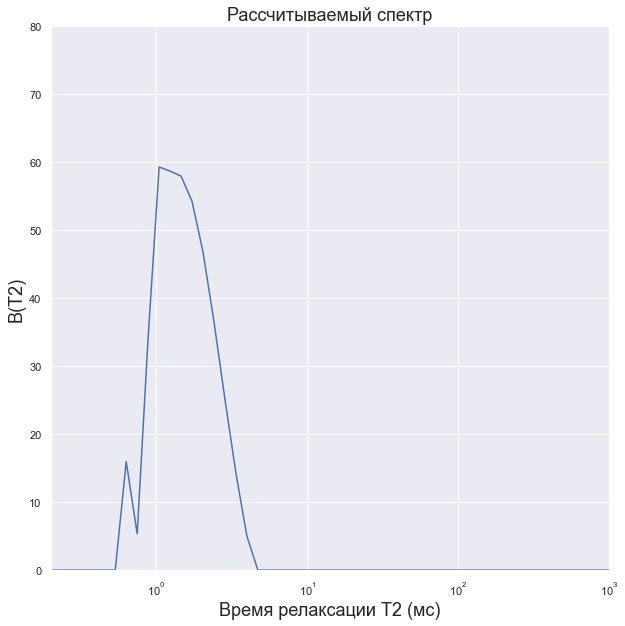

In [19]:
plt.semilogx(T2, second.coef_.reshape(-1,1))
#plt.plot(time_mc, amp, alpha = 0.5)

plt.ylim(0,80)
plt.xlim(0.2,1000)
plt.xlabel('Время релаксации Т2 (мс)', size = 18)
plt.ylabel('B(T2)', size = 18)
plt.title('Рассчитываемый спектр', size = 18)

### Работа с файлом И4529.prn ###

Все аналогично, сначала чтение файла

In [20]:
raw_file = open('И4529.prn')
data_2 = {}

for line in raw_file:
    temp = line.split()
    data_2[float(temp[0])] = float(temp[1])

raw_file.close()

Перевод времени в мс

In [21]:
time_mc_2 = np.array(list(data_2.keys())).reshape(-1,1)/1000
amp_2 = np.array(list(data_2.values())).reshape(-1,1)

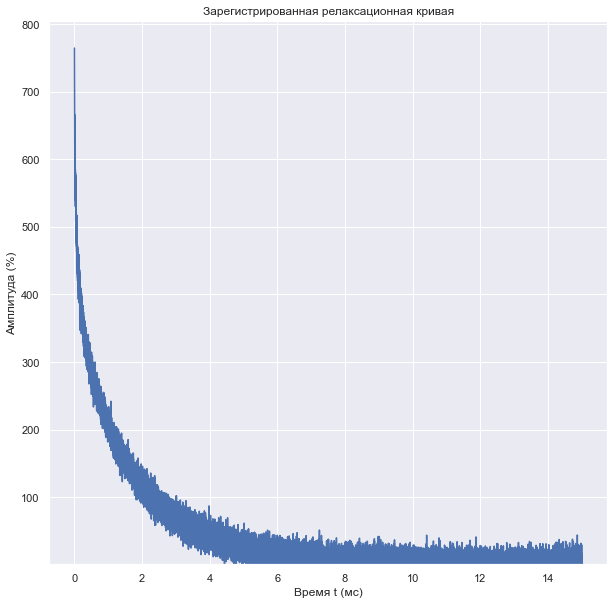

In [22]:
plt.plot(time_mc_2, amp_2)
#plt.yticks([1, 10, 100, 1000])
plt.ylim(1)
plt.xlabel('Время t (мс)');
plt.ylabel('Амплитуда (%)');
plt.title('Зарегистрированная релаксационная кривая');

Пользуясь написанными ранее функциями, ищем лучший классификатор

In [23]:
res_2 = [] # проведен поиск по сетке для каждого классификатора
for clf, grid in zip(estimators, param_grids.keys()):
    gs = GridSearchCV(estimator = clf, param_grid = param_grids[grid])
    gs.fit(np.exp(-time_mc_2/T2), amp_2)
    res_2.append(['%s'%(clf), gs.best_score_, gs.best_estimator_])

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186624.66073609702, tolerance: 934.9182439940616
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326610.5752930988, tolerance: 22654.31998492346
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1324116.1609568645, tolerance: 21774.804096403146
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not 

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1336597.047025575, tolerance: 21774.804096403146
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1331790.3889309166, tolerance: 21393.929706955263
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1368479.9551781956, tolerance: 21247.795829364633
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286276.2990862422, tolerance: 21774.804096403146
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270850.4465433585, tolerance: 21393.929706955263
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219677.06382451602, tolerance: 21247.795829364633
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not 

In [24]:
best_sort(res_2, True)

[['Ridge()', 0.31339845306750647, Ridge(alpha=0.1)],
 ['Lasso()', 0.3115792330114434, Lasso(alpha=0.0001)],
 ['ElasticNet()', 0.3115792330114434, ElasticNet(alpha=0.0001, l1_ratio=1)],
 ['LinearRegression()', -3.066797746077354e+21, LinearRegression()]]

In [25]:
best_sort(res_2, True)[1] # возьмем Лассо - второй после ridge - регрессии
est = Lasso(0.0001, positive = True)
est.fit(np.exp(-time_mc_2/T2), amp_2)

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292162.6209285464, tolerance: 22946.444771957158
  positive)


Lasso(alpha=0.0001, positive=True)

Проверка качества регрессии

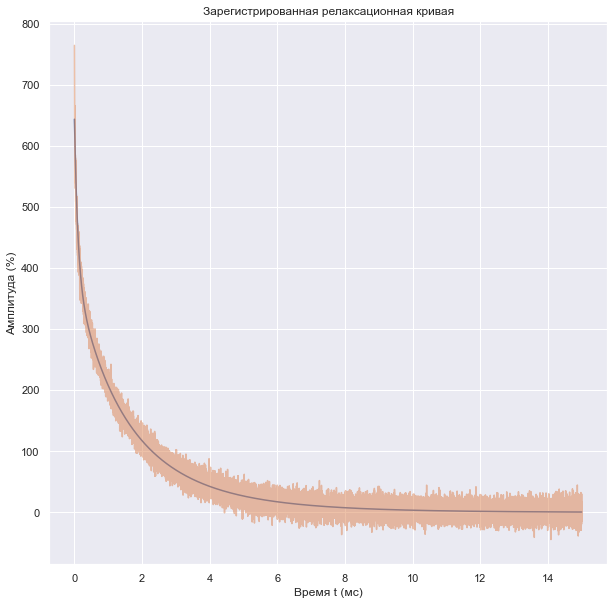

In [26]:
plt.plot(time_mc_2, est.predict(np.exp(-time_mc_2/T2)))
plt.plot(time_mc_2, amp_2, alpha = 0.5)
plt.xlabel('Время t (мс)');
plt.ylabel('Амплитуда (%)');
plt.title('Зарегистрированная релаксационная кривая');

Вывод значений B(T2) и времени рекласации на график

Text(0.5, 1.0, 'Рассчитываемый спектр')

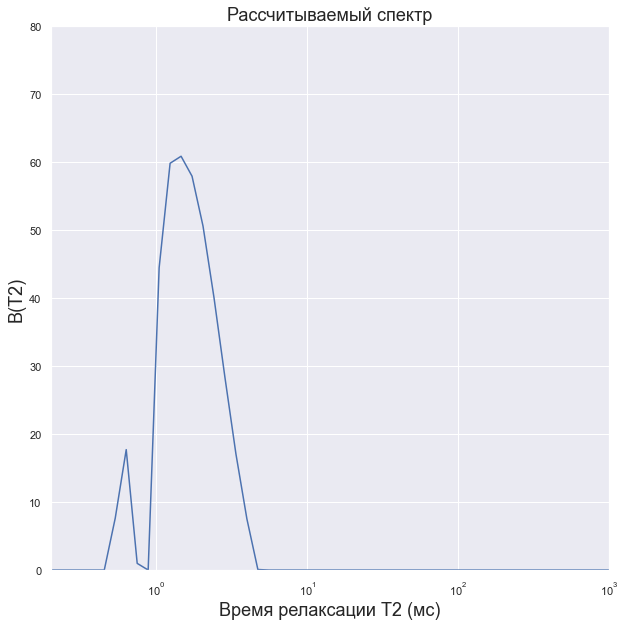

In [27]:
plt.semilogx(T2, est.coef_.reshape(-1,1))
#plt.plot(time_mc, amp, alpha = 0.5)

plt.ylim(0,80)
plt.xlim(0.2,1000)
plt.xlabel('Время релаксации Т2 (мс)', size = 18)
plt.ylabel('B(T2)', size = 18)
plt.title('Рассчитываемый спектр', size = 18)

### Работа с файлом РБ122.prn ###

Все аналогично, сначала чтение файла

In [28]:
raw_file = open('РБ122.prn')
data_3 = {}

for line in raw_file:
    temp = line.split()
    data_3[float(temp[0])] = float(temp[1])

raw_file.close()

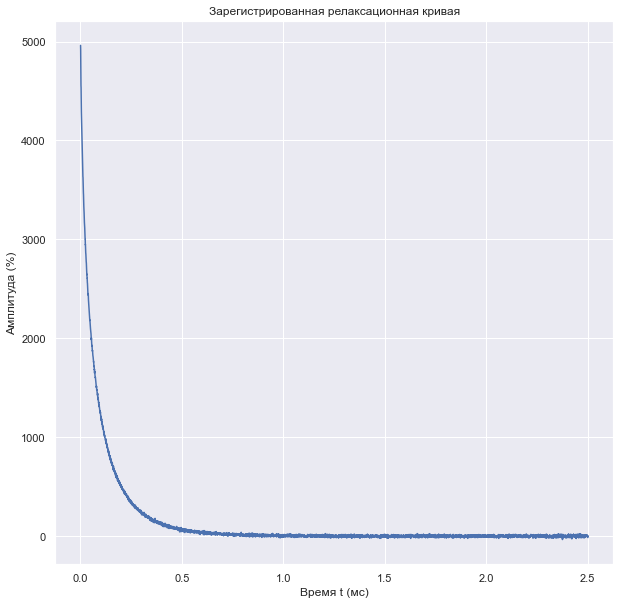

In [29]:
time_mc_3 = np.array(list(data_3.keys())).reshape(-1,1)/1000
amp_3 = np.array(list(data_3.values())).reshape(-1,1)

plt.plot(time_mc_3, amp_3)
plt.xlabel('Время t (мс)');
plt.ylabel('Амплитуда (%)');
plt.title('Зарегистрированная релаксационная кривая');

Пользуясь написанными ранее функциями, ищем лучший классификатор

In [30]:
res_3 = [] # проведен поиск по сетке для каждого классификатора
for clf, grid in zip(estimators, param_grids.keys()):
    gs = GridSearchCV(estimator = clf, param_grid = param_grids[grid])
    gs.fit(np.exp(-time_mc_3/T2), amp_3)
    res_3.append(['%s'%(clf), gs.best_score_, gs.best_estimator_])

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4226.7470031969715, tolerance: 85.88361302814495
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4691711.565242916, tolerance: 128818.0407598059
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4888632.057174024, tolerance: 128123.2642416514
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not con

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9443405.439220913, tolerance: 128123.2642416514
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9405247.973742286, tolerance: 128068.38667109233
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9375056.920796568, tolerance: 128073.38835900032
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not co

X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14856663.111093774, tolerance: 128073.38835900032
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4525722.100918843, tolerance: 128818.0407598059
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4786899.366157423, tolerance: 128123.2642416514
  positive)
X:\Users\jeka_\Anaconda3\envs\My_projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not co

In [31]:
best_sort(res_3, True)

[['Lasso()', -0.6006961155403565, Lasso(alpha=1)],
 ['ElasticNet()', -0.6006961155403565, ElasticNet(alpha=1, l1_ratio=1)],
 ['Ridge()', -1.3974987625298152, Ridge(alpha=1)],
 ['LinearRegression()', -91364861.11549866, LinearRegression()]]

In [32]:
best_sort(res_2, True)[0] # возьмем Лассо
est_3 = Lasso(1, positive = True)
est_3.fit(np.exp(-time_mc_3/T2), amp_3)

Lasso(alpha=1, positive=True)

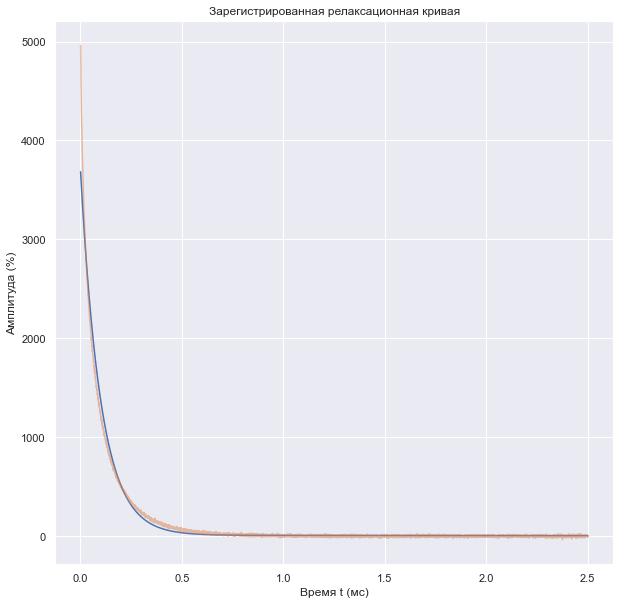

In [37]:
plt.plot(time_mc_3, est_3.predict(np.exp(-time_mc_3/T2)))
plt.plot(time_mc_3, amp_3, alpha = 0.5)
plt.xlabel('Время t (мс)');
plt.ylabel('Амплитуда (%)');
plt.title('Зарегистрированная релаксационная кривая');

Вывод значений B(T2) и времени рекласации на график

Text(0.5, 1.0, 'Рассчитываемый спектр')

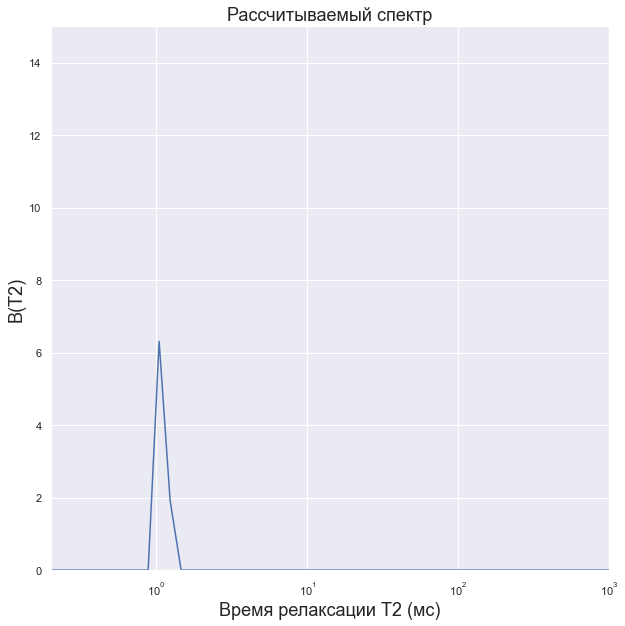

In [38]:
plt.semilogx(T2, est_3.coef_.reshape(-1,1))
#plt.plot(time_mc, amp, alpha = 0.5)

plt.ylim(0,15)
plt.xlim(0.2,1000)
plt.xlabel('Время релаксации Т2 (мс)', size = 18)
plt.ylabel('B(T2)', size = 18)
plt.title('Рассчитываемый спектр', size = 18)

Теперь можно вывести все три спектра на один график

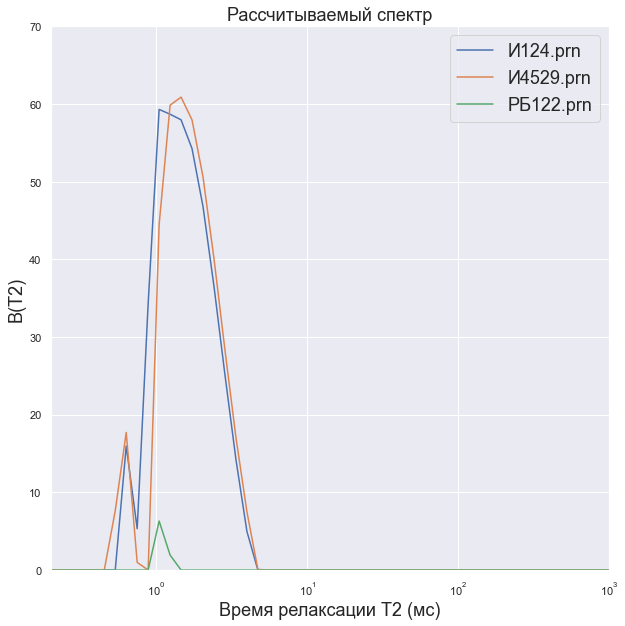

In [53]:
plt.semilogx(T2, second.coef_.reshape(-1,1))
plt.semilogx(T2, est.coef_.reshape(-1,1))
plt.semilogx(T2, est_3.coef_.reshape(-1,1))
plt.ylim(0,70)
plt.xlim(0.2,1000)
plt.xlabel('Время релаксации Т2 (мс)', size = 18)
plt.ylabel('B(T2)', size = 18)
plt.title('Рассчитываемый спектр', size = 18)
plt.legend(['И124.prn','И4529.prn','РБ122.prn'], fontsize = 18)

Вывод: получены три спектра для трех разных образцов.